<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [1]:
!pip install pandas

### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [7]:
## Write your code here
duplicate_rows= df[df.duplicated(keep= 'first')]
print(" Duplicate Rows : ", duplicate_rows)


 Duplicate Rows :  Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWorkedWith,

##### Task 2: Remove the duplicate rows from the dataframe.



In [8]:
## Write your code here
df_cleaned = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

Number of rows after removing duplicates: 65437


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [9]:
## Write your code here
missing_values= df.isnull().sum()
print(missing_values)

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [11]:
## Write your code here
miss_values= df['RemoteWork'].isnull().sum()
print(" Missing Values in RemoteWork Column : ", miss_values)

 Missing Values in RemoteWork Column :  10631


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [12]:
## Write your code here
Remote_Work= df['RemoteWork'].value_counts()
print("Value Count for RemoteWork column : " , Remote_Work)

Value Count for RemoteWork column :  RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [14]:
## Write your code here
Mode_val= df['RemoteWork'].mode()[0]
print("Most frequent Value in Remote Work : " , Mode_val)

Most frequent Value in Remote Work :  Hybrid (some remote, some in-person)


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [16]:
## Write your code here
df['RemoteWork']= df['RemoteWork'].fillna(Mode_val)
print(f"Missing values in 'RemoteWork' column after imputation: {df['RemoteWork'].isnull().sum()}")

Missing values in 'RemoteWork' column after imputation: 0


##### Task 8: Check for any compensation-related columns and describe their distribution.



Compensation-related columns: ['CompTotal']

Summary for CompTotal:
count     3.374000e+04
mean     2.963841e+145
std      5.444117e+147
min       0.000000e+00
25%       6.000000e+04
50%       1.100000e+05
75%       2.500000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64


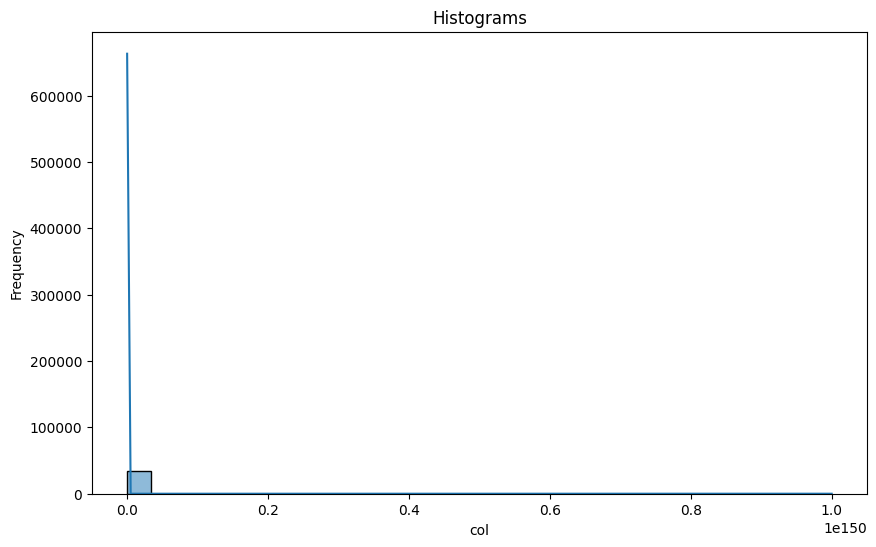

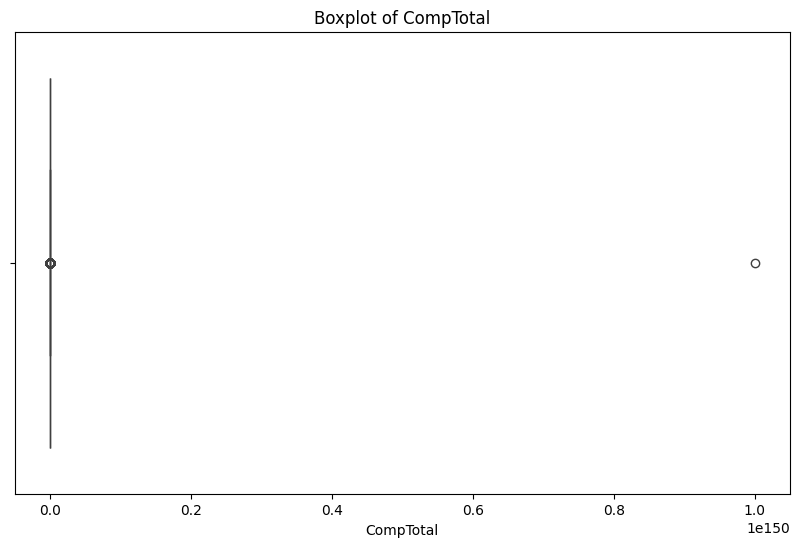

In [22]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Check for compensation-related columns (keywords like salary, compensation, etc.)
compensation_keywords = ['compensation', 'salary', 'income', 'pay', 'wage', 'bonus', 'total']
compensation_columns = [col for col in df.columns if any(keyword.lower() in col.lower() for keyword in compensation_keywords)]

# Display the found compensation-related columns
print("Compensation-related columns:", compensation_columns)

# Describe the distribution of each compensation-related column
for col in compensation_columns:
    print(f"\nSummary for {col}:")
    print(df[col].describe())  # Summary statistics (mean, std, min, 25%, 50%, 75%, max)
    
# Visualize the distribution using histograms
plt.figure(figsize=(10, 6))
sns.histplot(df[col], kde=True, bins=30)  # KDE adds a smooth curve over the histogram
plt.title('Histograms')
plt.xlabel('col')
plt.ylabel('Frequency')
plt.show()

# If you want to check for outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[col])
plt.title(f'Boxplot of {col}')
plt.show()

### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
